# Setup

Importing things we need, such as pandas (a data analysis and manipulation tool), numpy (a Python package for computing) and scikit-learn (an ML package for Python). Please note scikit-learn is imported using the sklearn identifier.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

Please check the path to the data file is ok.

In [2]:
input_file = "./MergeConflictsDataset.csv"

Now, we have to read the data from a file (e.g., a csv file) and store it into memory. For this, we can use pandas' read_csv:

In [3]:
data = pd.read_csv(input_file, header = 0, delimiter=';')

Let us see the data we've got:

In [4]:
data

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,c52216c411e4d7d9ef7845926f471f49f48b3ea5,5d50b1ca2496766e6d3f3673e1f6abff20f9ffaf,d7727481e759ef6ac2c285d64c4ebb86666652f9,5d50b1ca2496766e6d3f3673e1f6abff20f9ffaf,1,66,0,0,1,184,...,0,0,0,0,0,19,19,19.00000,19.0,0
26969,8bf4fb99b439379ed99f0a4fc761fa65ca31d8ba,a248acc589a43d7234d383252546b99b27ec32b9,478863dfe34904b9490be64c0d508e0af6b46b2f,ebffde52d50a6c8f9973ec675b8ab17dea5420e1,1,1,1,2,1,762,...,0,0,0,0,0,30,34,33.20000,34.0,0
26970,a27a50f87f61d871ddb1aeed6993b132fd657ea6,542ff7fe4297d73a39664b468962ab681e4bea91,ddddae9b5f9537cb06d2c4872184fa25d9f3ca77,542ff7fe4297d73a39664b468962ab681e4bea91,1,1,1,0,1,22,...,0,0,0,0,0,8,58,33.00000,33.0,0
26971,ddddae9b5f9537cb06d2c4872184fa25d9f3ca77,542ff7fe4297d73a39664b468962ab681e4bea91,e6ed8366b6e1e72bc8de97159198c64edab5cd96,542ff7fe4297d73a39664b468962ab681e4bea91,1,1,1,0,1,11,...,0,0,0,0,0,8,8,8.00000,8.0,0


How many lines and columns do we have?

In [5]:
data.shape

(26973, 37)

Which are the columns of our data?

In [6]:
data.columns

Index(['commit', 'parent1', 'parent2', 'ancestor', 'is pr', 'added lines',
       'deleted lines', 'devs parent1', 'devs parent2', 'time', 'nr files',
       'added files', 'deleted files', 'renamed files', 'copied files',
       'modified files', 'nr commits1', 'nr commits2', 'density1', 'density2',
       'fix', 'bug', 'feature', 'improve', 'document', 'refactor', 'update',
       'add', 'remove', 'use', 'delete', 'change', 'messages_min',
       'messages_max', 'messages_mean', 'messages_median', 'conflict'],
      dtype='object')

Let's see a sample of our data: first 5 lines

In [7]:
data.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1


Maybe we want to see the type of each column:

In [8]:
data.dtypes

commit              object
parent1             object
parent2             object
ancestor            object
is pr                int64
added lines          int64
deleted lines        int64
devs parent1         int64
devs parent2         int64
time                 int64
nr files             int64
added files          int64
deleted files        int64
renamed files        int64
copied files         int64
modified files       int64
nr commits1          int64
nr commits2          int64
density1             int64
density2             int64
fix                  int64
bug                  int64
feature              int64
improve              int64
document             int64
refactor             int64
update               int64
add                  int64
remove               int64
use                  int64
delete               int64
change               int64
messages_min         int64
messages_max         int64
messages_mean      float64
messages_median    float64
conflict             int64
d

Now, we want to assign numerical codes to the data at hand. The first option is to assign distinct numbers to each possible value in a column. LabelEncoder can do that. Let's try this for every column in our data.

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_1 = data.apply(le.fit_transform)

Let's see what we've got:

In [10]:
data_1

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,25206,25994,9899,18212,1,5,0,0,1,23,...,0,0,0,0,0,20,64,451,33,0
1,4283,11968,26283,11668,0,970,1111,1,2,371,...,0,0,0,0,0,31,116,1732,100,1
2,24358,5698,19606,3951,1,0,0,0,1,22,...,0,0,0,0,0,18,17,71,29,0
3,1270,6896,14036,18400,1,0,0,2,1,24,...,0,0,0,0,0,22,62,582,55,0
4,7008,12515,9845,2600,0,0,0,1,2,2,...,0,0,0,0,0,31,55,770,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,20769,9780,22531,6834,1,66,0,0,1,184,...,0,0,0,0,0,19,18,77,31,0
26969,14869,16788,7494,17026,1,1,1,2,1,736,...,0,0,0,0,0,30,33,384,61,0
26970,17164,8839,23185,6131,1,1,1,0,1,22,...,0,0,0,0,0,8,57,378,59,0
26971,23388,8839,24104,6131,1,1,1,0,1,11,...,0,0,0,0,0,8,7,13,9,0


First, we grab the values of all attributes: based upon them, we will predict the value of the target (the label).

In [11]:
X = data_1[data.columns.drop('conflict')]

What do we have in the attribute part of our data?

In [12]:
X

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,update,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median
0,25206,25994,9899,18212,1,5,0,0,1,23,...,3,0,0,0,0,0,20,64,451,33
1,4283,11968,26283,11668,0,970,1111,1,2,371,...,1,0,0,0,0,0,31,116,1732,100
2,24358,5698,19606,3951,1,0,0,0,1,22,...,0,0,0,0,0,0,18,17,71,29
3,1270,6896,14036,18400,1,0,0,2,1,24,...,0,0,0,0,0,0,22,62,582,55
4,7008,12515,9845,2600,0,0,0,1,2,2,...,0,0,0,0,0,0,31,55,770,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,20769,9780,22531,6834,1,66,0,0,1,184,...,0,0,0,0,0,0,19,18,77,31
26969,14869,16788,7494,17026,1,1,1,2,1,736,...,4,0,0,0,0,0,30,33,384,61
26970,17164,8839,23185,6131,1,1,1,0,1,22,...,0,0,0,0,0,0,8,57,378,59
26971,23388,8839,24104,6131,1,1,1,0,1,11,...,0,0,0,0,0,0,8,7,13,9


Then, we select the array containing the labels (the values we want to predict for each example).

In [13]:
y = data_1['conflict']

Which are the labels corresponding to each example?

In [14]:
y

0        0
1        1
2        0
3        0
4        1
        ..
26968    0
26969    0
26970    0
26971    0
26972    0
Name: conflict, Length: 26973, dtype: int64

# Model

Let's build the classifier (model) in form of a neural network.

Split dataset

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,update,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median
25076,19268,26396,16798,15565,1,1,1,4,1,49,...,1,1,0,0,1,1,83,136,6887,204
23271,22021,17668,5122,2588,1,1,0,19,1,207,...,2,19,2,6,1,6,65,417,8241,234
3658,14356,7889,23212,8744,0,1,1,31,1,0,...,9,21,15,19,0,3,12,124,660,65
257,4222,10488,907,4374,0,19,6,1,9,213,...,3,0,0,1,0,0,15,80,731,91
2202,4935,560,11502,393,1,1,1,0,1,1,...,0,0,1,0,0,0,61,60,1936,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,26896,6452,1966,15441,1,10,0,1,1,4,...,1,1,0,0,0,1,111,127,7778,233
5390,10466,7513,17572,15976,1,186,132,2,1,96,...,0,0,0,1,0,1,94,98,5946,186
860,22483,10306,16761,9919,1,15,15,2,1,107,...,4,0,0,0,0,0,36,68,938,79
15795,19236,7419,8316,17378,1,82,0,6,1,212,...,1,2,1,6,0,1,23,77,1132,95


In [17]:
y_train

25076    0
23271    0
3658     0
257      0
2202     0
        ..
21575    0
5390     0
860      0
15795    0
23654    0
Name: conflict, Length: 21578, dtype: int64

Let's scale the data, while preventing data leakage:

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now let's build and train the model:

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), validation_split=0.2)

# Please ignore the warnings as I don't have expensive hardware

2023-05-10 11:13:58.353709: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 11:13:58.562957: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-10 11:13:58.599155: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-10 11:13:58.599177: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

Epoch 1/50
675/675 [==============================] - 1s 1ms/step - loss: 0.1692 - accuracy: 0.9422 - val_loss: 0.1132 - val_accuracy: 0.9577
Epoch 2/50
675/675 [==============================] - 1s 1ms/step - loss: 0.0989 - accuracy: 0.9601 - val_loss: 0.1022 - val_accuracy: 0.9576
Epoch 3/50
675/675 [==============================] - 1s 906us/step - loss: 0.0888 - accuracy: 0.9629 - val_loss: 0.0933 - val_accuracy: 0.9589
Epoch 4/50
675/675 [==============================] - 1s 965us/step - loss: 0.0810 - accuracy: 0.9649 - val_loss: 0.0889 - val_accuracy: 0.9611
Epoch 5/50
675/675 [==============================] - 1s 943us/step - loss: 0.0771 - accuracy: 0.9653 - val_loss: 0.0843 - val_accuracy: 0.9652
Epoch 6/50
675/675 [==============================] - 1s 916us/step - loss: 0.0729 - accuracy: 0.9666 - val_loss: 0.0820 - val_accuracy: 0.9626
Epoch 7/50
675/675 [==============================] - 1s 916us/step - loss: 0.0700 - accuracy: 0.9677 - val_loss: 0.0816 - val_accuracy: 0.9

You may want to take a look at it, or you can save it as a .h5 file.

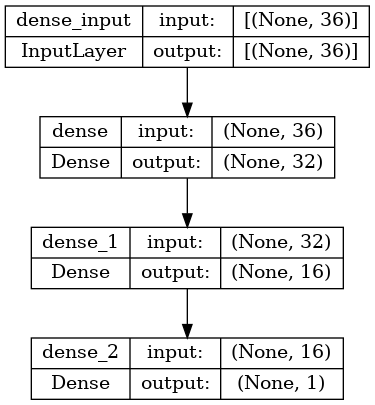

In [20]:
from keras.utils import plot_model

model.save('my_model.h5')
plot_model(model, to_file='multilayer_perceptron.png', show_shapes=True)

# Metrics

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) # generate predictions for the test dataset
y_pred = (y_pred > 0.5)

confusion_matrix(y_test, y_pred)

169/169 [==============================] - 0s 633us/step


array([[4980,  110],
       [ 105,  200]])

In [39]:
accuracy_score(y_test, y_pred)

0.9601482854494903

In [40]:
precision_score(y_test, y_pred)

0.6451612903225806

In [41]:
recall_score(y_test, y_pred)

0.6557377049180327

In [42]:
f1_score(y_test, y_pred)

0.6504065040650406

In [43]:
roc_auc_score(y_test, y_pred)

0.8170633514766982